In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Load the pneumonia dataset
train_dir = "C:/Users/Rithanya/Downloads/xrays/chest_xray/train"
validation_dir = "C:/Users/Rithanya/Downloads/xrays/chest_xray/val"
test_dir = "C:/Users/Rithanya/Downloads/xrays/chest_xray/test"

In [3]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                             shear_range=0.2,
                                                             zoom_range=0.2,
                                                             horizontal_flip=True)

In [4]:
validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [5]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(224, 224),
                                                              batch_size=32,
                                                              class_mode='binary')

Found 16 images belonging to 2 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 624 images belonging to 2 classes.


In [9]:
# Define the model architecture
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [10]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
163/163 [==============================] - 483s 3s/step - loss: 0.4075 - accuracy: 0.8267 - val_loss: 0.9660 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 346s 2s/step - loss: 0.2592 - accuracy: 0.8900 - val_loss: 0.8607 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 358s 2s/step - loss: 0.2297 - accuracy: 0.9045 - val_loss: 1.1882 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 362s 2s/step - loss: 0.2122 - accuracy: 0.9172 - val_loss: 0.4764 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 411s 3s/step - loss: 0.2085 - accuracy: 0.9179 - val_loss: 0.8545 - val_accuracy: 0.6250
Epoch 6/10
163/163 [==============================] - 474s 3s/step - loss: 0.1778 - accuracy: 0.9302 - val_loss: 0.8082 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 420s 3s/step - loss: 0.1710 - accuracy: 0.9358 - val_loss: 1.3514 - val_accuracy: 0.6250

In [12]:
# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [13]:
# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [14]:
epochs_range = range(10)

Text(0.5, 1.0, 'Training and Validation Accuracy')

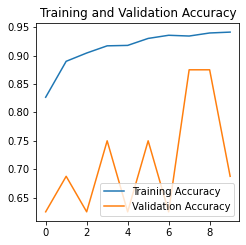

In [15]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
#We train the model using the training data and check its performance on both 
#the training and validation sets (evaluation metric is accuracy). 
#The training accuracy comes out to be 95% whereas the validation accuracy is 62%.

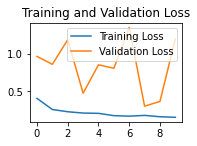

In [16]:
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
#The training loss indicates how well the model is fitting the training data, 
#While the validation loss indicates how well the model fits new data

In [17]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("Test accuracy:", test_acc)

20/20 - 21s - loss: 0.6040 - accuracy: 0.8157 - 21s/epoch - 1s/step
Test accuracy: 0.8157051205635071


In [18]:
import pickle
from tensorflow import keras

In [19]:
model.save('C:/Users/Rithanya/Desktop/modelxrays')

INFO:tensorflow:Assets written to: C:/Users/Rithanya/Desktop/modelxrays\assets


INFO:tensorflow:Assets written to: C:/Users/Rithanya/Desktop/modelxrays\assets


In [7]:
#PREDICTION OF SINGLE IMAGE
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt                                         
import cv2

In [8]:
# Load the trained model
model = keras.models.load_model('C:/Users/Rithanya/Desktop/modelxrays')

In [10]:
# Load a single test image
img_path = "C:/Users/Rithanya/Desktop/Test images/pne img2.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))

In [11]:
# Preprocess the image
img = img / 255.0
img = np.expand_dims(img, axis=0)

In [12]:
# Predict the class probabilities
probs = model.predict(img)

1/1 [==============================] - 0s 351ms/step


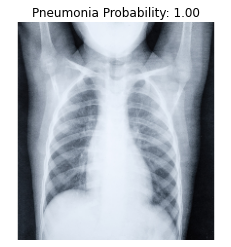

In [13]:
# Visualize the image and the predicted probabilities
plt.imshow(img[0])
plt.title(f'Pneumonia Probability: {probs[0][0]:.2f}')
plt.axis('off')
plt.show()

In [26]:
#CONFUSION MATRIX
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [27]:
# Load the test set
test_dir = 'C:/Users/Rithanya/Downloads/xrays/chest_xray/test'
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 624 images belonging to 2 classes.


In [28]:
# Load the trained model
model = keras.models.load_model('C:/Users/Rithanya/Desktop/modelxrays')

In [29]:
# Make predictions on the test set
y_true = test_generator.classes
y_pred = model.predict(test_generator)

20/20 [==============================] - 11s 528ms/step


In [30]:
# Convert the probabilities to class labels
y_pred = np.round(y_pred).flatten()

In [31]:
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

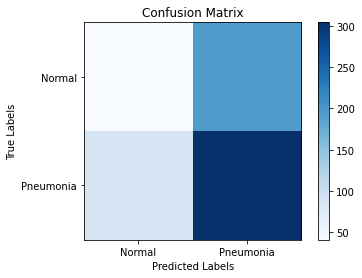

In [32]:
# Visualize the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['Normal', 'Pneumonia'])
plt.yticks([0, 1], ['Normal', 'Pneumonia'])
plt.colorbar()
plt.show()